In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import json
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from mstream.mstream import Mstream

plt.style.use("ggplot")

<IPython.core.display.Javascript object>

In [33]:
DS_DIR = "data"
DS_NAMES = ["News", "News-T", "Tweets", "Tweets-T"]
DS_PATHS = [os.path.join(DS_DIR, ds_name) for ds_name in DS_NAMES]

<IPython.core.display.Javascript object>

In [34]:
def load_batches(ds_path, batch_size=int(2 ** 8)):
    with open(ds_path) as f:
        docs = []
        for line in f:
            parsed_line = json.loads(line)
            docs.append(parsed_line)
            if len(docs) == batch_size:
                yield docs
                docs = []
        if len(docs) > 0:
            yield docs

<IPython.core.display.Javascript object>

In [5]:
def transform(docs):
    return [{"id": doc["Id"], "word_list": doc["textCleaned"].split()} for doc in docs]

<IPython.core.display.Javascript object>

In [6]:
def calc_nmi(y, y_hat):
    return normalized_mutual_info_score(y, y_hat)

<IPython.core.display.Javascript object>

In [41]:
num_docs = sum([len(doc_batch) for doc_batch in load_batches(DS_PATHS[2])])
batch_size = math.ceil(num_docs / 16)
mstream = Mstream()
parsed_docs = next(load_batches(DS_PATHS[2], batch_size))
docs = transform(parsed_docs)
res = mstream.process(docs)

<IPython.core.display.Javascript object>

In [45]:
mstream.get_top_words()

{0: {'pas': 0.0021862795041602988, 'mourners': 0.006431482424859908, 'recall': 0.006431482424859908, 'sarge': 0.006431482424859908, 'shriver': 0.010676685345559518, 'charity': 0.006431482424859908, 'idealism': 0.006431482424859908, 'ap': 0.004308880964510103, 'sargent': 0.0021862795041602988, 'optimist': 0.004308880964510103, 'pio': 0.0021862795041602988, 'fishing': 0.02128969264730854, 'fantastic': 0.0021862795041602988, 'mcdonalds': 0.0467609101715062, 'time': 0.0021862795041602988, 'day': 0.01704448972660893, 'ice': 0.004308880964510103, 'post': 0.010676685345559518, 'january': 0.004308880964510103, 'wisconsin': 0.0021862795041602988, 'offer': 0.0021862795041602988, 'license': 0.004308880964510103, 'milwaukee': 0.0021862795041602988, 'journal': 0.004308880964510103, 'sentinel': 0.0021862795041602988, 'blog': 0.010676685345559518, 'lady': 0.004308880964510103, 'remembered': 0.0021862795041602988, 'helped': 0.0021862795041602988, 'fort': 0.0021862795041602988, 'worth': 0.0043088809645

TypeError: cannot unpack non-iterable int object

<IPython.core.display.Javascript object>

In [36]:
res

[15,
 0,
 71,
 41,
 48,
 62,
 52,
 1,
 0,
 52,
 1,
 1,
 0,
 11,
 33,
 1,
 31,
 1,
 1,
 106,
 2,
 58,
 97,
 27,
 2,
 31,
 4,
 19,
 2,
 71,
 98,
 58,
 58,
 51,
 1,
 2,
 41,
 51,
 63,
 6,
 52,
 1,
 52,
 6,
 3,
 20,
 62,
 71,
 1,
 5,
 3,
 22,
 22,
 32,
 3,
 2,
 0,
 0,
 1,
 8,
 22,
 2,
 23,
 71,
 80,
 63,
 7,
 33,
 4,
 16,
 58,
 45,
 30,
 60,
 16,
 1,
 1,
 30,
 12,
 77,
 98,
 30,
 11,
 2,
 6,
 33,
 9,
 6,
 9,
 82,
 23,
 51,
 70,
 11,
 8,
 33,
 62,
 8,
 7,
 11,
 0,
 23,
 9,
 11,
 15,
 6,
 8,
 1,
 6,
 8,
 62,
 4,
 62,
 8,
 73,
 28,
 82,
 27,
 58,
 1,
 62,
 4,
 1,
 55,
 1,
 1,
 23,
 1,
 2,
 58,
 41,
 0,
 58,
 6,
 13,
 27,
 27,
 4,
 1,
 23,
 51,
 4,
 2,
 1,
 4,
 71,
 58,
 6,
 13,
 4,
 62,
 1,
 71,
 8,
 4,
 2,
 98,
 2,
 58,
 19,
 22,
 8,
 1,
 27,
 58,
 33,
 3,
 1,
 52,
 14,
 13,
 13,
 1,
 10,
 1,
 58,
 1,
 14,
 5,
 1,
 37,
 5,
 22,
 13,
 4,
 2,
 82,
 14,
 4,
 109,
 62,
 8,
 5,
 5,
 8,
 22,
 10,
 8,
 5,
 65,
 13,
 63,
 62,
 15,
 2,
 22,
 51,
 79,
 5,
 116,
 22,
 62,
 8,
 30,
 1,
 5,
 5,
 1,
 76,


<IPython.core.display.Javascript object>

Caculate the NMI for each batch

In [67]:
num_batches = 16
num_total_docs = sum([len(doc_batch) for doc_batch in load_batches(DS_PATHS[2])])
batch_size = math.ceil(num_total_docs / num_batches)
mstream = Mstream()
nmis = []
for parsed_docs in load_batches(DS_PATHS[2], batch_size):
    docs = transform(parsed_docs)
    nmi = normalized_mutual_info_score(
        [doc["clusterNo"] for doc in parsed_docs], mstream.process(docs)
    )
    nmis.append(nmi)

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (16,) and (10,)

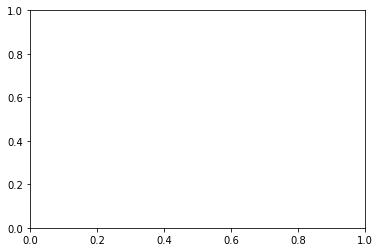

<IPython.core.display.Javascript object>

In [72]:
plt.plot(range(1, num_batches + 1), nmis)
plt.ylabel("NMI")
plt.xlabel("Batch number")
plt.title("NMI for each batch")
plt.show()

Calculate the NMI as a function of the number of iterations

In [29]:
num_batches = 16
max_num_iter = 11
num_iters = list(range(1, max_num_iter))
ds_nmis = []
for ds_path in DS_PATHS:
    num_total_docs = sum([len(batch) for batch in load_batches(ds_path)])
    batch_size = math.ceil(num_total_docs / num_batches)
    batch_size = 1
    nmis = []
    for num_iter in num_iters:
        mstream = Mstream(num_iter)
        y_hat = []
        y = []
        for parsed_docs in load_batches(ds_path, batch_size):
            y += [doc["clusterNo"] for doc in parsed_docs]
            y_hat += mstream.process(transform(parsed_docs))
        nmi = normalized_mutual_info_score(y, y_hat)
        nmis.append(nmi)
    ds_nmis.append(nmis)

<IPython.core.display.Javascript object>

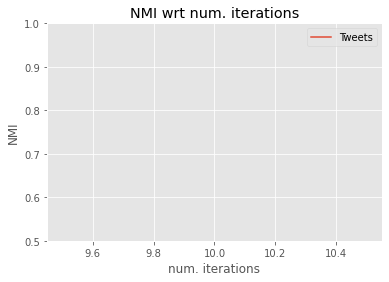

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots()
ax.set_title("NMI wrt num. iterations")
ax.set_xlabel("num. iterations")
ax.set_ylabel("NMI")
# ax.set_yticks(np.arange(0.5, 1.1, step=0.1))
ax.set_ylim(0.5, 1)
for i, ds_nmi in enumerate(ds_nmis):
    ax.plot(num_iters, ds_nmi, label=DS_NAMES[i])
ax.legend()